In [1]:
import os
import sys
from pathlib import Path

import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

from multiview_mapping_toolkit.utils.prediction_metrics import (
    compute_comprehensive_metrics,
)

sys.path.append("..")
from constants import get_IDs_to_labels

In [2]:
PROJECT_ROOT = Path(os.path.abspath(""), "..", "..").resolve()
SITE_NAMES = ("chips", "delta", "lassic")

ortho sum: 243, MVMT sum: 236
chips Ortho accuracy: 0.52, CA recall 0.36, CA precision: 0.56
chips multiview accuracy: 0.70, CA recall 0.65, CA precision: 0.61
ortho sum: 288, MVMT sum: 265
delta Ortho accuracy: 0.65, CA recall 0.56, CA precision: 0.54
delta multiview accuracy: 0.80, CA recall 0.72, CA precision: 0.73
ortho sum: 178, MVMT sum: 178
lassic Ortho accuracy: 0.31, CA recall 0.51, CA precision: 0.46
lassic multiview accuracy: 0.56, CA recall 0.75, CA precision: 0.64
[array([[22,  1,  0, 12,  9],
       [ 0,  0,  0,  1,  1],
       [ 1,  0,  1, 11, 22],
       [ 5,  9,  0, 39, 10],
       [ 2,  8,  0, 25, 64]]), array([[ 13,   3,   4,   3,   4],
       [  1,   6,   1,   9,  14],
       [  4,   0,  29,   1,   2],
       [  8,   3,   4, 104,   8],
       [  6,   6,  10,  11,  34]]), array([[17,  0,  3, 32, 11],
       [ 9,  7,  1, 53, 10],
       [ 1,  0,  2,  0,  2],
       [ 0,  0,  0, 25,  0],
       [ 0,  0,  1,  0,  4]])]
[array([[36,  0,  0,  0,  6],
       [ 0,  1,  0,  

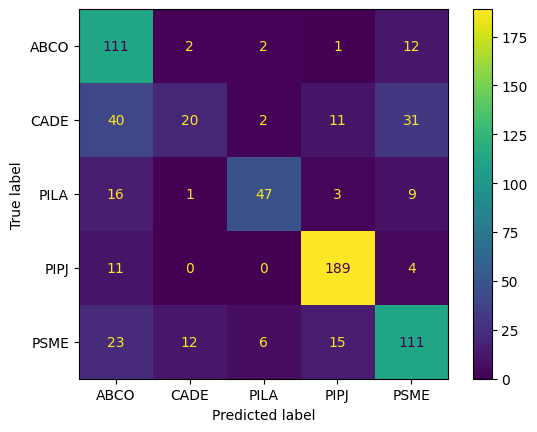

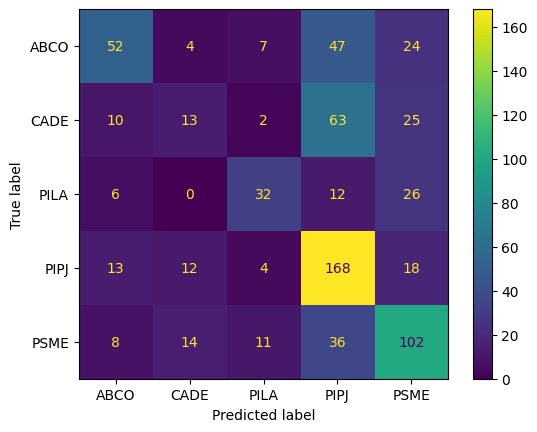

In [5]:
ortho_matrices = []
MVMT_matrices = []

IDs_to_labels = get_IDs_to_labels()

class_names = list(IDs_to_labels.keys())
labels = list(IDs_to_labels.values())
for site_name in SITE_NAMES:
    MVMT_data = np.load(
        Path(
            PROJECT_ROOT,
            "per_site_processing",
            site_name,
            "05_processed_predictions",
            f"{site_name}_MVMT_confusion_matrix.npy",
        )
    )
    MVMT_matrices.append(MVMT_data)
    ortho_data = np.load(
        Path(
            PROJECT_ROOT,
            "per_site_processing",
            site_name,
            "05_processed_predictions",
            f"{site_name}_ortho_confusion_matrix.npy",
        )
    )
    ortho_matrices.append(ortho_data)
    print(f"ortho sum: {np.sum(ortho_data)}, MVMT sum: {np.sum(MVMT_data)}")

    ortho_metrics = compute_comprehensive_metrics(ortho_data, class_names=labels)
    multiview_metrics = compute_comprehensive_metrics(
        MVMT_data, class_names=labels
    )
    
    ortho_accuracy = ortho_metrics["accuracy"]
    ortho_CA_recall = ortho_metrics["class_averaged_recall"]
    ortho_CA_precision = ortho_metrics["class_averaged_precision"]
    
    multiview_accuracy = multiview_metrics["accuracy"]
    multiview_CA_recall = multiview_metrics["class_averaged_recall"]
    multiview_CA_precision = multiview_metrics["class_averaged_precision"]
    
    print(f"{site_name} Ortho accuracy: {ortho_accuracy:.2f}, CA recall {ortho_CA_recall:.2f}, CA precision: {ortho_CA_precision:.2f}")
    print(f"{site_name} multiview accuracy: {multiview_accuracy:.2f}, CA recall {multiview_CA_recall:.2f}, CA precision: {multiview_CA_precision:.2f}")
print(ortho_matrices)
print(MVMT_matrices)

aggregated_ortho = np.sum(ortho_matrices, axis=0)
aggregated_MVMT = np.sum(MVMT_matrices, axis=0)


cf_disp = ConfusionMatrixDisplay(
    confusion_matrix=aggregated_MVMT, display_labels=labels
)
cf_disp.plot()
cf_disp = ConfusionMatrixDisplay(
    confusion_matrix=aggregated_ortho, display_labels=labels
)
cf_disp.plot()


ortho_metrics = compute_comprehensive_metrics(aggregated_ortho, class_names=class_names)
multiview_metrics = compute_comprehensive_metrics(
    aggregated_MVMT, class_names=class_names
)

ortho_accuracy = ortho_metrics["accuracy"]
ortho_CA_recall = ortho_metrics["class_averaged_recall"]
ortho_CA_precision = ortho_metrics["class_averaged_precision"]

multiview_accuracy = multiview_metrics["accuracy"]
multiview_CA_recall = multiview_metrics["class_averaged_recall"]
multiview_CA_precision = multiview_metrics["class_averaged_precision"]

print(f"Ortho accuracy: {ortho_accuracy:.2f}, CA recall {ortho_CA_recall:.2f}, CA precision: {ortho_CA_precision:.2f}")
print(f"multiview accuracy: {multiview_accuracy:.2f}, CA recall {multiview_CA_recall:.2f}, CA precision: {multiview_CA_precision:.2f}")

print(ortho_metrics["per_class"])
print(multiview_metrics["per_class"])